


<h1 align="center">Customer Segmentation</h1> 
<h4 align='center'>using K-means clustering</h4>
<div style="text-align: right">created<br>
-- by <a href="https://github.com/daanyal011" target="_blank"><b>Daanyal Parbulkar</b></a><br>
--<a href="https://www.linkedin.com/in/daanyal-parbulkar-02a764228/" target="_blank"><b>Add me on Linkedin</b></a> 

--- 


<H3>1.Importing libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans

#### 2.Loading our dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 3. Cleaning and Transforming The Data

#### 3.1 checking its DataTypes

In [3]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

#### 3.2 The CustomerID is of no use for us lets drop it

In [4]:
df.drop('CustomerID',axis=1,inplace = True)

#### 3.3 Description about our data in basic statistics

In [5]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


#### 3.4 Checking if our dataset has any null values

In [6]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### It doesn't have any null values which is great :)

#### 4. Now Lets Start with exploratory Data Analysis

##### 4.1 First we will see Do we have more female or male customers

In [7]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [8]:
fig1 = px.pie(df,names='Gender',title='Ratio of Gender Distribution. Clearly There are 12% more Females than Males')
fig1.show()

#### 4.2 Let us look at he age distribution

In [9]:
fig2 = px.box(df,x='Gender',y='Age')
fig2.show()

#### Minimum age for both males and females is 18.<br> Wheresas the average age for males is 37 and for females is 35

#### 4.3 Let's Check which age group has the most customers

In [10]:
fig4 = px.histogram(df,x='Age',nbins=15,color='Gender',title='Age group has the most number of customers')
fig4.show()

#### It is clearly seen Age group 30-34 has more customers,followed by 35-39 and 45-49 

### 4.4 Let's see which age Group Spends The most

In [11]:
fig5 = px.histogram(df,x='Age',y='Spending Score (1-100)',color='Gender',nbins=15,title='Spending Score Age group wise')
fig5.show()

#### It is clearly seen Age group 30-34 has a higher spending Score,followed by 35-39 and 20-24

### 4.4 Let's see which age group has the highest annual income

In [12]:
fig6 = px.histogram(df,x='Age',y='Annual Income (k$)',nbins=15,color='Gender',title='Annual Income Age Group Wise')
fig6.show()

#### It is clearly seen Age group 30-34 has a higher Annual Income,followed by 35-39, But Unlike the spending score the Age group 45-49 comes third.

In [13]:
fig3 = px.scatter(df, x='Annual Income (k$)',y='Spending Score (1-100)',color='Age',title= 'Annual Income vs Spending Score Scatter Plot')
fig3.show()

##### It is clearly seen that the younger people tend to spend more but do not have a High Income. <br>On the other hand The people from the Age group 30-34 & 35-39 have a high Annual Income plus they also have a High Spending Score and have a higher count in the number of cutomers. <br>So Age group 30-34 are regular customers and they should be the utmost priority

## 5.Customer Segmentation using K-Means

In [14]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### 5.1 Data Standardisation 


#### We will standardise our data so that it best fits into our K-Means model<br>Standardisation means converting our data set into appropiate values of 0's and 1's

##### First we will convert male's into 1 and Female's into 0 , Because our model does not accept strings

In [15]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})

In [16]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [17]:
#Standardising Data
X = df.copy()
X = StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992]])

### 5.2 Finding the best Number of K

#### For Finding the best Number of K's we will use the elbow method

**The Elbow Method**

The Elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center.

When these overall metrics for each model are plotted, it is possible to visually determine the best value for k. If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is the best value of k. The “arm” can be either up or down, but if there is a strong inflection point, it is a good indication that the underlying model fits best at that point.

We use the Elbow Method which uses Within Cluster Sum Of Squares (WCSS) against the the number of clusters (K Value) to figure out the optimal number of clusters value. WCSS measures sum of distances of observations from their cluster centroids which is given by the below formula.

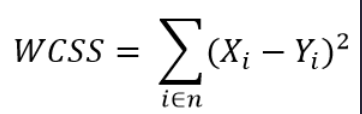

where Yi is centroid for observation Xi. The main goal is to maximize number of clusters and in limiting case each data point becomes its own cluster centroid.

In [18]:
wcss=[]
for i in range(1,21):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

In [19]:
fig = px.line(x=np.arange(1,21,1),y=wcss,markers=True)
fig.update_layout(
    title="Elbow Method",
    xaxis_title="K Value",
    yaxis_title="WCSS",
    legend_title="Legend Title",
)
fig.show()

It is clear, that the optimal number of clusters for our data are 5, as the slope of the curve is not steep enough after it. When we observe this curve, we see that last elbow comes at k = 5, it would be difficult to visualize the elbow if we choose the higher range.

### 5.3 Building our model

In [20]:
k_means = KMeans(init="k-means++", n_clusters=5, n_init=15)
k_means.fit(X)

KMeans(n_clusters=5, n_init=15)

In [21]:
print("Cluster Centers: ",k_means.cluster_centers_)

Cluster Centers:  [[-0.88640526  0.73868428 -0.54302375 -0.41076909]
 [ 1.12815215 -0.76072691  0.05496398  0.83369302]
 [-0.88640526 -0.75047453 -0.00501655  0.6979562 ]
 [ 1.12815215  1.22385356 -0.4498575  -0.44231533]
 [ 0.21835203  0.1126274   1.12370799 -1.33771584]]


In [22]:
df1 = df.copy()

In [23]:
df1['cluster']  = k_means.labels_
df1['Gender'] = df1['Gender'].map({1:'Male',0:'Female'})

In [24]:
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,2
4,Female,31,17,40,0


### 5.4 Visualisation of KMeans clusters

In [25]:
fig25 = px.scatter_3d(df1,x='cluster',y='Age',z='Spending Score (1-100)',color ='Annual Income (k$)',title='3-D Visualisation of KMeans')
fig25.show()

In [26]:
fig27 = px.scatter(df1,x='Annual Income (k$)',y='Spending Score (1-100)',color='cluster',title='2-D Visualisation of KMeans')
fig27.show()

### 6. Analysis

In [27]:
fig25 = px.scatter_3d(df1,x='cluster',y='Age',z='Spending Score (1-100)',color ='cluster')
fig25.show()

In [28]:
df1.groupby(['cluster']).mean()#.sort_values(['Annual Income (k$)','Annual Income (k$)'],ascending=False)

,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
0,49.142857,46.333333,39.619048
1,28.250000,62.000000,71.675000
2,28.392857,60.428571,68.178571
3,55.903226,48.774194,38.806452
4,40.419355,90.000000,15.741935


<u>Cluster 0 (Dark Blue):</U> These are average income earners with average spending scores.They have an average age of <B>49</B>. They are cautious with their spending at the store.<br><br>
<u>Cluster 1 (Purple):</u> The customers in this group are high income earners and with high spending scores.They have an average age of <B>28</B>. They bring in profit. Discounts and other offers targeted at this group will increase their spending score and maximize profit.<br><br>
<u>Cluster 2 (Pink):</u>  These are slightly above average income earners with slightly above average spending scores.They have a average age of <B>55</B>. They are cautious with their spending at the store<br><br>
<u>Cluster 3 (Orange):</u> The customers in this group are the 2nd highest income earners and with the highest spending scores.They have a average age of <B>28</B>. They bring in profit. Discounts and other offers targeted at this group will increase their spending score and maximize profit.<br><br>
<u>Cluster 4 (Yellow):</u>  Earning high and spending less. We see that people have high income but low spending scores, this is interesting.They have a average age of <B>40</B>. Maybe these are the people who are unsatisfied or unhappy by the mall’s services. These can be the prime targets of the mall, as they have the potential to spend money. So, the mall authorities will try to add new facilities so that they can attract these people and can meet their needs.

<h2>Created By:</h2>
<a href="https://github.com/daanyal011" target="_blank"><b>daanyal011----->GitHub</b></a>

#### Connect with me on Linkedin
<a href="https://www.linkedin.com/in/daanyal-parbulkar-02a764228/" target="_blank"><b>Daanyal Parbulkar</b></a>